In [59]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions, Images

In [60]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [61]:
domain = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

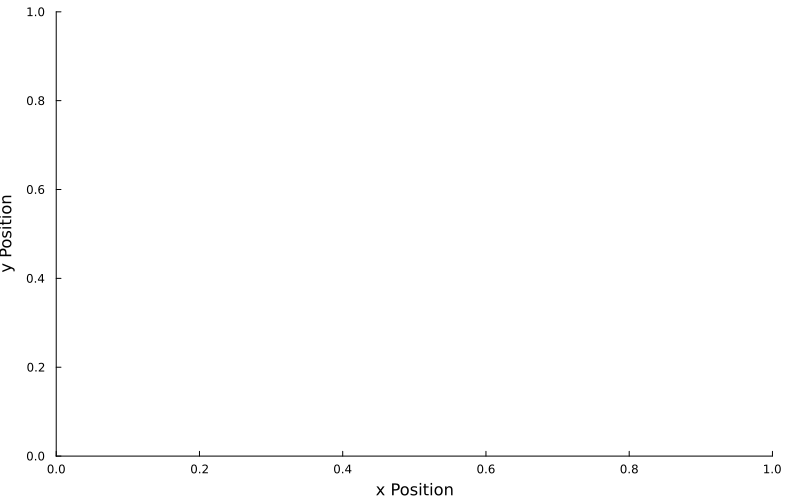

In [62]:
# Define the plot
num_points = 64

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / (num_points - 1) for j in 0:num_points-1, i in 0:num_points-1]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / (num_points - 1) for j in 0:num_points-1, i in 0:num_points-1]

grid = range(0, stop=1, length=num_points)
plot_size = (400, 250) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2], xlabel="x Position", ylabel="y Position", color=:viridis, colorbar_title="Amplitude", size=plot_size, grid=false)

# plt_gt = deepcopy(plt)
# plot_spikes!(plt_gt, μ0, label=L"μ_0", colorscheme=:viridis)

## Check $\sigma$ parameter

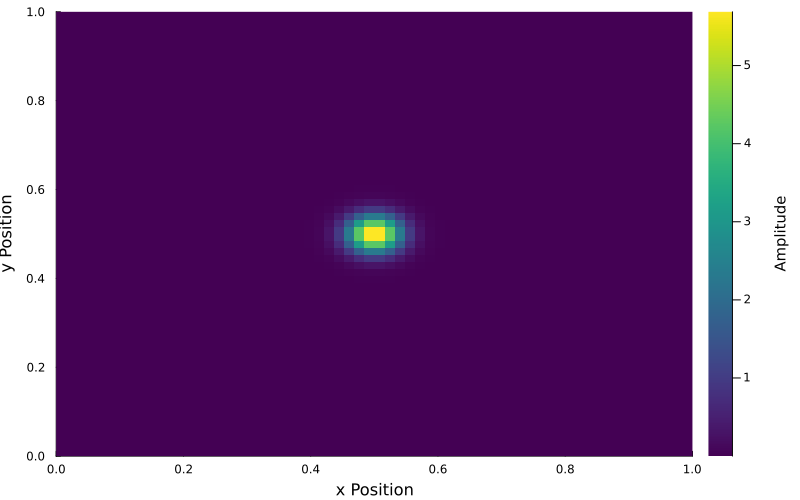

In [63]:
# const noise_mean = 0.0021172377176794793
const σ2 = let
    λ = 723.0 # Wavelength
    NA = 1.4 # Numerical aperture
    FWHM = λ / (2 * NA) # Full width at half maximum i.e. diffraction limit
    σ = FWHM / (2 * log(2.0))
    (σ / (64 * 100.0))^2
end
σ = sqrt(σ2)

ops = gaussian_operators_2D(σ, plt_grid_x1, plt_grid_x2)

plt_test_σ = deepcopy(plt)
heatmap!(plt_test_σ, grid, grid, ops.adjΦ(ops.Φ([0.5], [0.5], [1.0])), color=:viridis)

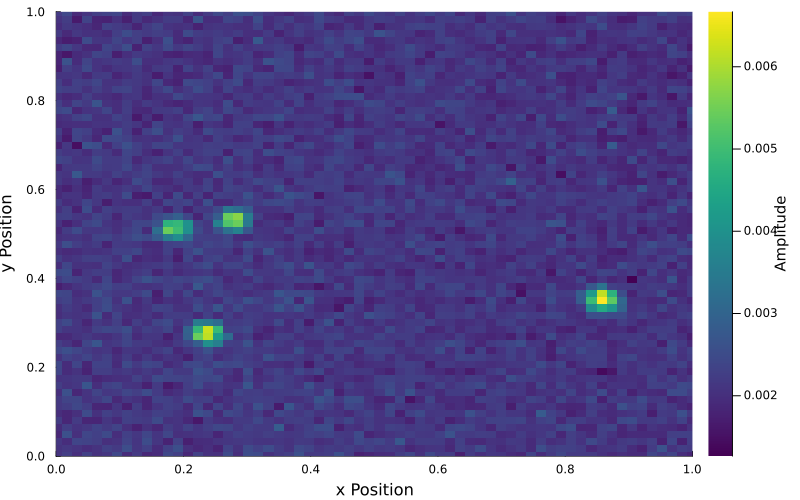

In [64]:
plt_obs = deepcopy(plt)

image = load("../sequence/00001.tif")

y = channelview(image)
heatmap!(plt_obs, grid, grid, y, label="y_0", color=:viridis)

### SFW

In [65]:
λ = 0.032 # Regularisation parameter

prob = BLASSO(vec(y), ops, λ, domain)

BLASSO{N0f16}(N0f16[0.00208N0f16, 0.00204N0f16, 0.00212N0f16, 0.00185N0f16, 0.00194N0f16, 0.00221N0f16, 0.00197N0f16, 0.00214N0f16, 0.00215N0f16, 0.00198N0f16  …  0.00211N0f16, 0.00163N0f16, 0.00186N0f16, 0.002N0f16, 0.00163N0f16, 0.00188N0f16, 0.00198N0f16, 0.00186N0f16, 0.00203N0f16, 0.00232N0f16], Operators(var"#ϕ#38"{Float64, Matrix{Float64}, Matrix{Float64}, var"#gauss2DN#37"{var"#gauss2D#36"}}(0.029103474178647337, [0.0 0.015873015873015872 … 0.9841269841269841 1.0; 0.0 0.015873015873015872 … 0.9841269841269841 1.0; … ; 0.0 0.015873015873015872 … 0.9841269841269841 1.0; 0.0 0.015873015873015872 … 0.9841269841269841 1.0], [0.0 0.0 … 0.0 0.0; 0.015873015873015872 0.015873015873015872 … 0.015873015873015872 0.015873015873015872; … ; 0.9841269841269841 0.9841269841269841 … 0.9841269841269841 0.9841269841269841; 1.0 1.0 … 1.0 1.0], var"#gauss2DN#37"{var"#gauss2D#36"}(var"#gauss2D#36"())), var"#Φ#40"{var"#ϕ#38"{Float64, Matrix{Float64}, Matrix{Float64}, var"#gauss2DN#37"{var"#gauss2D#3

In [66]:
solve!(prob, :SFW, options=Dict(:maxits => 100))

DiscreteMeasure([[0.8492063492063487, 0.19841269841269774, 0.2499999999999992, 0.2499999999999996, 0.29999999999999993], [0.3571428571428571, 0.4999999999999998, 0.2999999999999992, 0.25, 0.5499999999999999]], [0.002216915912520515, 0.0012279995987538742, 0.0004647635444217828, 0.0002703011696800991, 0.000189011757690114], 2, 5)

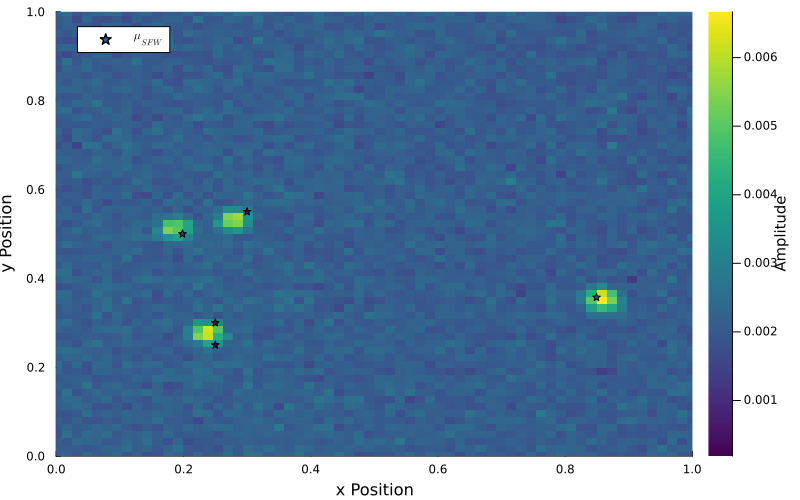

In [67]:
plt_sfw = deepcopy(plt_obs)

plot_spikes!(plt_sfw, prob.μ, label=L"μ_{SFW}", colorscheme=:viridis, marker=:star)

## Random frame

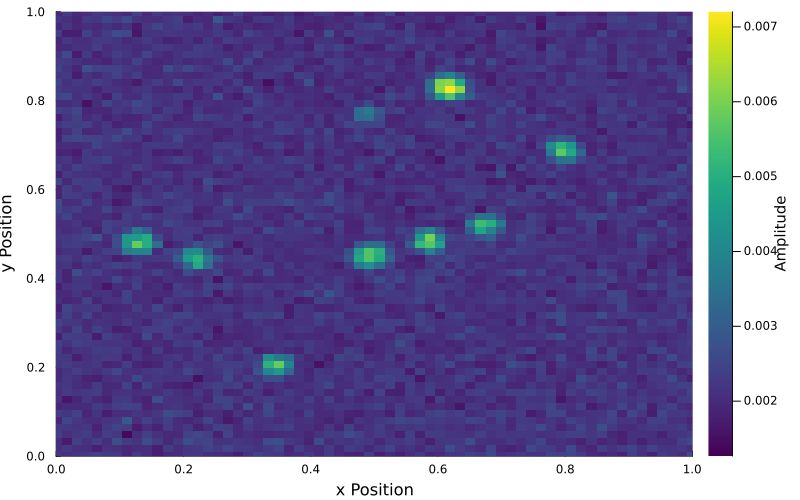

In [68]:
image = load("../sequence/03462.tif")

y = channelview(image)
heatmap!(plt_obs, grid, grid, y, label="y_0", color=:viridis)

In [69]:
prob = BLASSO(vec(y), ops, λ, domain)
solve!(prob, :SFW, options=Dict(:maxits => 100))

DiscreteMeasure([[0.5, 0.6269841269841269, 0.3412698412698412, 0.8015873015873011, 0.5952380952380951, 0.1500000000000002, 0.19999999999999993, 0.1], [0.45238095238095244, 0.8333333333333335, 0.19841269841269882, 0.6904761904761905, 0.49999999999999933, 0.49999999999999994, 0.4500000000000001, 0.5]], [0.0020761259543587455, 0.0030207769660555673, 0.001415833458351128, 0.0015660304915262819, 0.001299200310747423, 0.0006590840024893055, 0.000514320092741253, 2.751231188649031e-5], 2, 8)

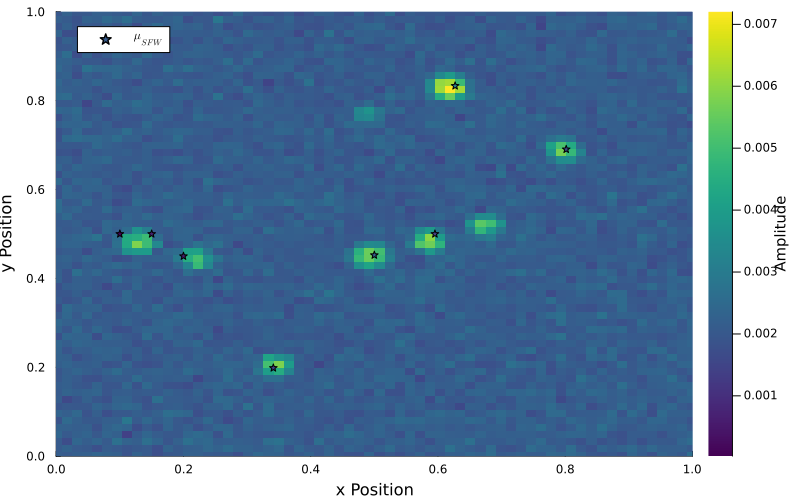

In [70]:
plt_sfw = deepcopy(plt_obs)

plot_spikes!(plt_sfw, prob.μ, label=L"μ_{SFW}", colorscheme=:viridis, marker=:star)